# Summer Of Code
## Batch 2
### Day 3

🔍 Step 1: Understand and Analyze the Dataset
Let’s first inspect the dataset to understand its structure, contents, and potential problems to solve.

In [41]:
import pandas as pd
path = r"E:\summer of code\bank\bank-full.csv"


# Read CSV using the correct path and separator
df = pd.read_csv(path, sep=';')
print(df.head())


   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


 # 1.2 Dataset Information

In [42]:
# Dataset shape and summary
df.info()

# Check for missing values
df.isnull().sum()

# Summary statistics
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


🧠 Step 2: Define the Problem
This is a bank marketing dataset from a Portuguese bank. The goal is to predict whether a client will subscribe to a term deposit (target: y), based on features like job, marital status, education, balance, and contact history.

📌 Problem Statement:
Build a machine learning model to predict whether a client will subscribe to a term deposit (y). This is a binary classification task.

# Step 3: Data Preprocessing

In [43]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv(r"E:\summer of code\bank\bank-full.csv", sep=';')

# Step 1: Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Step 2: Encode categorical variables
# Label encoding for binary column 'y'
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Label encoding for other categorical variables
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
if 'y' in cat_cols:
    cat_cols.remove('y')


# Use One-Hot Encoding for nominal categories
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Step 3: Split features and labels
X = df.drop('y', axis=1)
y = df['y']

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Missing Values:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


# 📈 Step 4: Analysis and Model Building (Baseline)
Let’s test with a simple Logistic Regression and show performance:



Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.94      7952
           1       0.65      0.34      0.45      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.70      9043
weighted avg       0.88      0.90      0.88      9043



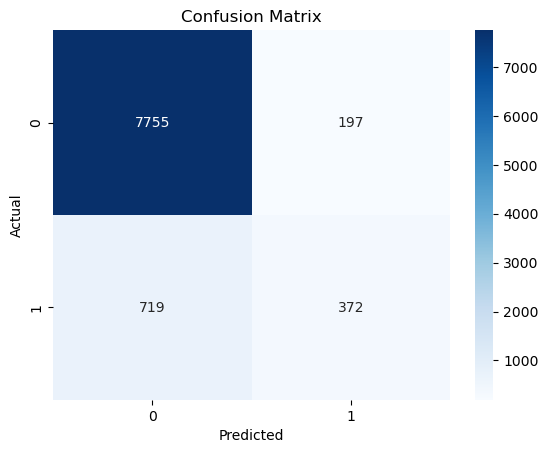

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# ⚙️ Common Setup (Imports & Tools)

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(y_true, y_pred, model_name):
    print(f"🔍 Results for {model_name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


# 1️⃣ Logistic Regression

🔍 Results for Logistic Regression
Accuracy: 0.8987061815769103
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.94      7952
           1       0.65      0.34      0.45      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.70      9043
weighted avg       0.88      0.90      0.88      9043



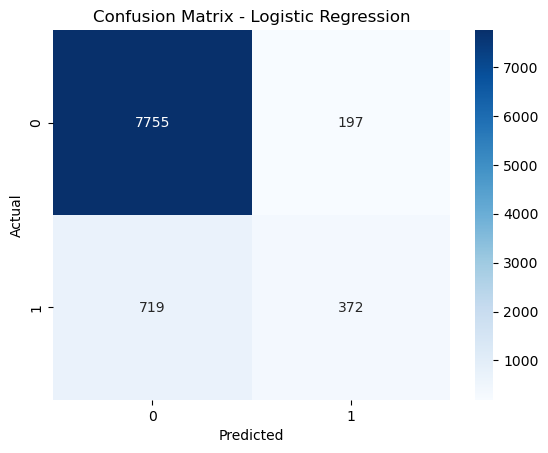

In [46]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
evaluate_model(y_test, y_pred_lr, "Logistic Regression")


# 2️⃣ Decision Tree

🔍 Results for Decision Tree
Accuracy: 0.8708393232334403
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93      7952
           1       0.47      0.48      0.47      1091

    accuracy                           0.87      9043
   macro avg       0.70      0.70      0.70      9043
weighted avg       0.87      0.87      0.87      9043



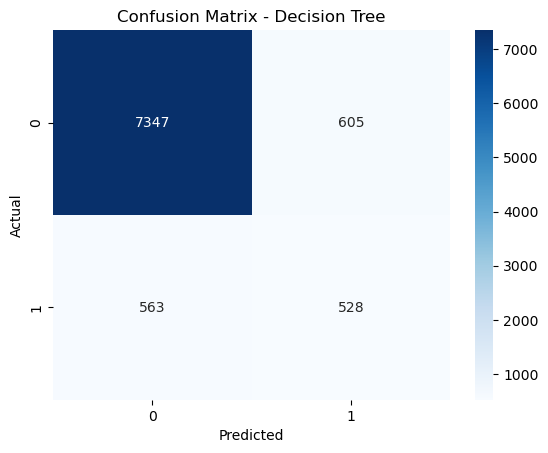

In [47]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)
evaluate_model(y_test, y_pred_dt, "Decision Tree")


# 3️⃣ Random Forest (Bagging Ensemble)

🔍 Results for Random Forest
Accuracy: 0.9036824062811014
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      7952
           1       0.67      0.40      0.50      1091

    accuracy                           0.90      9043
   macro avg       0.80      0.69      0.72      9043
weighted avg       0.89      0.90      0.89      9043



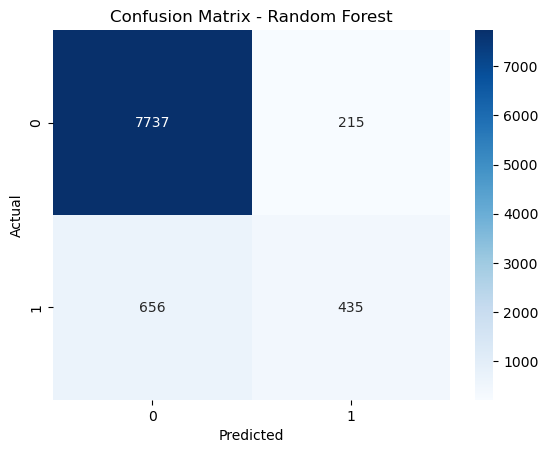

In [48]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
evaluate_model(y_test, y_pred_rf, "Random Forest")


# 4️⃣ Gradient Boosting (Boosting Ensemble)

🔍 Results for Gradient Boosting
Accuracy: 0.9036824062811014
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      7952
           1       0.66      0.42      0.51      1091

    accuracy                           0.90      9043
   macro avg       0.79      0.70      0.73      9043
weighted avg       0.89      0.90      0.89      9043



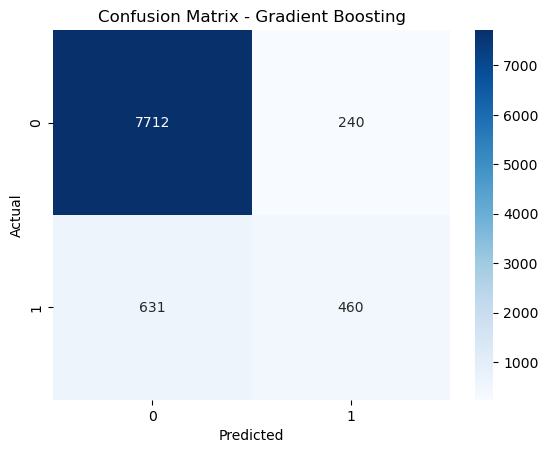

In [49]:
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train_scaled, y_train)
y_pred_gb = gb.predict(X_test_scaled)
evaluate_model(y_test, y_pred_gb, "Gradient Boosting")


# 5️⃣ Voting Classifier (Ensemble of All)

🔍 Results for Voting Classifier (Hard Voting)
Accuracy: 0.9018024991706293
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.95      7952
           1       0.69      0.33      0.45      1091

    accuracy                           0.90      9043
   macro avg       0.80      0.66      0.70      9043
weighted avg       0.89      0.90      0.89      9043



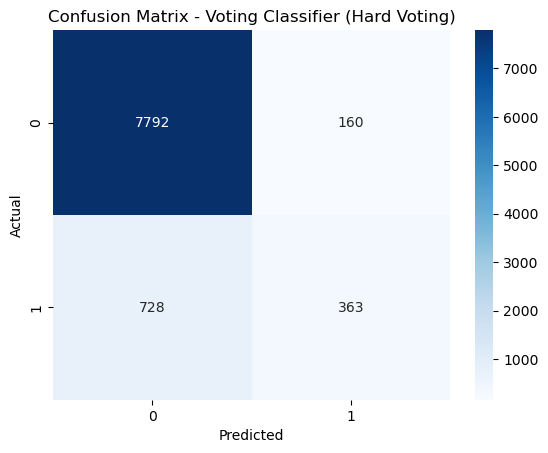

In [50]:
voting = VotingClassifier(estimators=[
    ('lr', lr),
    ('dt', dt),
    ('rf', rf),
    ('gb', gb)
], voting='hard')

voting.fit(X_train_scaled, y_train)
y_pred_vote = voting.predict(X_test_scaled)
evaluate_model(y_test, y_pred_vote, "Voting Classifier (Hard Voting)")


# ✅ Step-by-Step Code: Splitting + Preprocessing + Training with 80/10/10

now modify the data pipeline to include 3 sets:

Training set → 80% of the data

Validation set → 10%

Testing set → 10%

In [51]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv(r"E:\summer of code\bank\bank-full.csv", sep=';')

# Step 1: Encode target variable 'y'
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Step 2: Find and encode all categorical features
cat_cols = df.select_dtypes(include='object').columns.tolist()
if 'y' in cat_cols:
    cat_cols.remove('y')  # already encoded

# Apply one-hot encoding to categorical columns
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Step 3: Separate features and target
X = df.drop('y', axis=1)
y = df['y']

# Step 4: First split → 80% train, 20% temp (test + validation)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Second split → Split remaining 20% into 10% test and 10% validation (i.e. 50/50 split of 20%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print sizes to verify
print("Training set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Test set size:", len(X_test))

# Step 6: Scale features using StandardScaler
scaler = StandardScaler()

# Fit only on training data to avoid data leakage
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


Training set size: 36168
Validation set size: 4521
Test set size: 4522


# ✅ Train a Model on 80% and Validate on 10%
Let's train a Logistic Regression model first.

📊 Logistic Regression - Validation Set
Accuracy: 0.8998009289980093
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      4003
           1       0.61      0.34      0.44       518

    accuracy                           0.90      4521
   macro avg       0.77      0.66      0.69      4521
weighted avg       0.88      0.90      0.89      4521



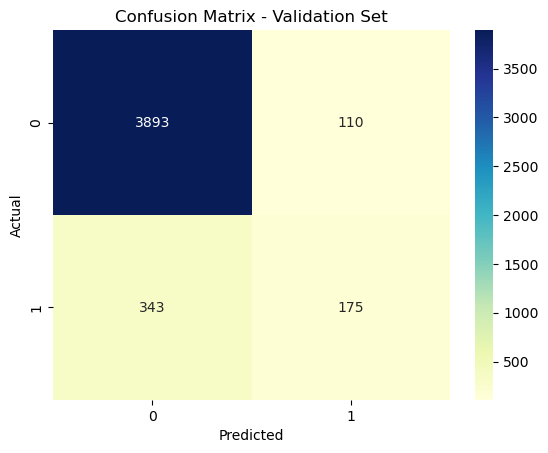

In [52]:
# Initialize Logistic Regression model
lr = LogisticRegression(max_iter=1000)

# Train on 80% training data
lr.fit(X_train_scaled, y_train)

# Predict on validation data
y_val_pred = lr.predict(X_val_scaled)

# Evaluate on validation set
print("📊 Logistic Regression - Validation Set")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred))

# Plot Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix - Validation Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# ✅ Final Testing on Unseen 10% Test Set

📊 Logistic Regression - Final Test Set
Accuracy: 0.8976116762494472
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      3949
           1       0.69      0.34      0.46       573

    accuracy                           0.90      4522
   macro avg       0.80      0.66      0.70      4522
weighted avg       0.88      0.90      0.88      4522



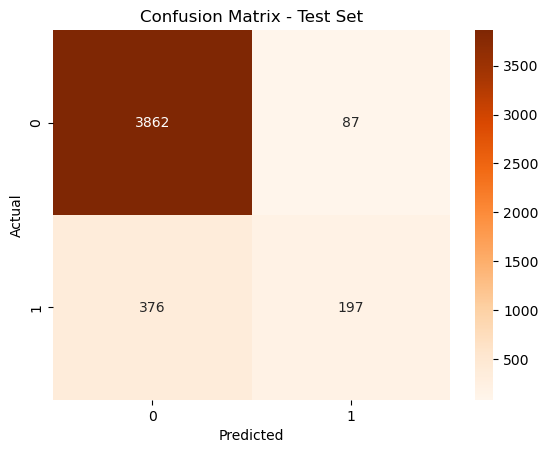

In [53]:
# Predict on final test data
y_test_pred = lr.predict(X_test_scaled)

# Evaluate on test set
print("📊 Logistic Regression - Final Test Set")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# 70/15/15 Split 

Let's now adjust the data splitting to:

70% Training

15% Validation

15% Testing

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------------
# 🔹 Step 1: Load the dataset
# -----------------------------------
df = pd.read_csv(r"E:\summer of code\bank\bank-full.csv", sep=';')

# -----------------------------------
# 🔹 Step 2: Encode target variable 'y'
# -----------------------------------
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# -----------------------------------
# 🔹 Step 3: One-Hot Encode categorical features
# -----------------------------------
cat_cols = df.select_dtypes(include='object').columns.tolist()
if 'y' in cat_cols:
    cat_cols.remove('y')

df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# -----------------------------------
# 🔹 Step 4: Split into features and target
# -----------------------------------
X = df.drop('y', axis=1)
y = df['y']

# -----------------------------------
# 🔹 Step 5: First split → 70% training, 30% temp (validation + testing)
# -----------------------------------
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)

# -----------------------------------
# 🔹 Step 6: Second split → 15% validation, 15% test (i.e. split 30% in half)
# -----------------------------------
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# -----------------------------------
# 🔹 Step 7: Feature Scaling
# -----------------------------------
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Show dataset sizes
print("Training Set Size:", len(X_train))
print("Validation Set Size:", len(X_val))
print("Test Set Size:", len(X_test))


Training Set Size: 31647
Validation Set Size: 6782
Test Set Size: 6782


# ✅ Train and Evaluate Logistic Regression

📊 Logistic Regression - Validation Set
Accuracy: 0.8984075493954585
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      5961
           1       0.65      0.35      0.46       821

    accuracy                           0.90      6782
   macro avg       0.78      0.66      0.70      6782
weighted avg       0.88      0.90      0.88      6782



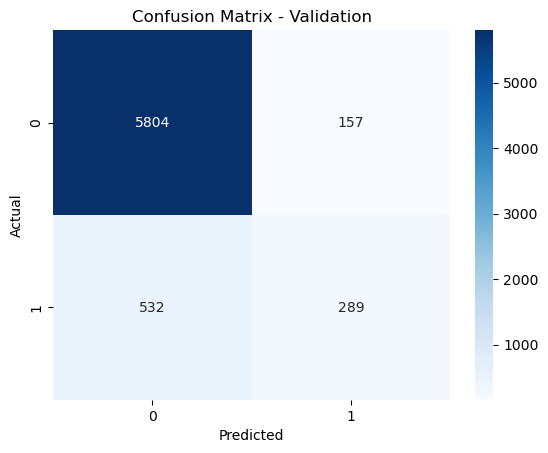

In [55]:
# -----------------------------------
# 🔹 Step 8: Train the model on 70% data
# -----------------------------------
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

# -----------------------------------
# 🔹 Step 9: Predict on validation set
# -----------------------------------
y_val_pred = lr.predict(X_val_scaled)

print("📊 Logistic Regression - Validation Set")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred))

# Confusion Matrix for validation
sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Validation")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# ✅ Final Evaluation on 15% Test Set

📊 Logistic Regression - Test Set
Accuracy: 0.9015039811265113
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      6005
           1       0.63      0.34      0.44       777

    accuracy                           0.90      6782
   macro avg       0.78      0.66      0.69      6782
weighted avg       0.89      0.90      0.89      6782



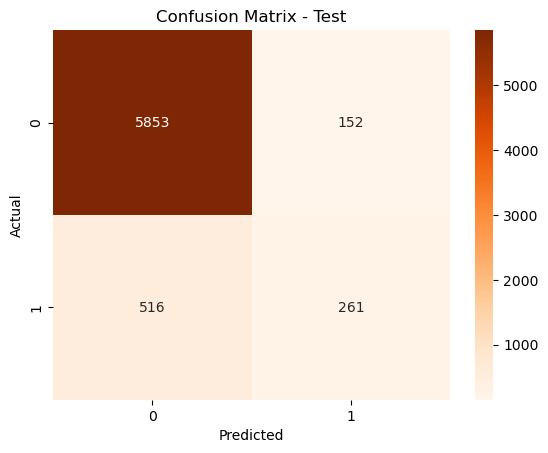

In [56]:
# -----------------------------------
# 🔹 Step 10: Predict on test set
# -----------------------------------
y_test_pred = lr.predict(X_test_scaled)

print("📊 Logistic Regression - Test Set")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

# Confusion Matrix for test
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - Test")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#  60/20/20 Split

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------------
# 🔹 Step 1: Load the dataset
# -----------------------------------

df = pd.read_csv(r"E:\summer of code\bank\bank-full.csv", sep=';')


# -----------------------------------
# 🔹 Step 2: Encode target column 'y' from yes/no to 1/0
# -----------------------------------
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# -----------------------------------
# 🔹 Step 3: Identify categorical features and apply one-hot encoding
# -----------------------------------
# Get all object-type columns (categorical)
cat_cols = df.select_dtypes(include='object').columns.tolist()

# Remove 'y' from that list if it's there (already encoded)
if 'y' in cat_cols:
    cat_cols.remove('y')

# Use get_dummies to convert categorical columns into numeric (one-hot encoding)
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# -----------------------------------
# 🔹 Step 4: Split into features (X) and target (y)
# -----------------------------------
X = df.drop('y', axis=1)
y = df['y']


# 🔹 Step 5: Split into 60% Train, 20% Validation, 20% Test

In [58]:
# First split: 60% training, 40% temporary (will be split again)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Second split: Split 40% into 20% validation and 20% test (i.e., 50/50 of remaining)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Show the number of samples in each set
print("Training set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Test set size:", len(X_test))


Training set size: 27126
Validation set size: 9042
Test set size: 9043


# 🔹 Step 6: Feature Scaling (Standardization)

In [59]:
# Initialize a standard scaler
scaler = StandardScaler()

# Fit the scaler only on training data to prevent data leakage
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same transformation to validation and test sets
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


# ✅ Step 7: Train Logistic Regression Model

In [60]:
# Initialize Logistic Regression with default parameters
lr = LogisticRegression(max_iter=1000)

# Train the model on the 60% training set
lr.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

# ✅ Step 8: Evaluate on 20% Validation Set

📊 Logistic Regression - Validation Set Evaluation
Accuracy: 0.9001327140013271
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      7994
           1       0.63      0.34      0.44      1048

    accuracy                           0.90      9042
   macro avg       0.77      0.66      0.69      9042
weighted avg       0.88      0.90      0.89      9042



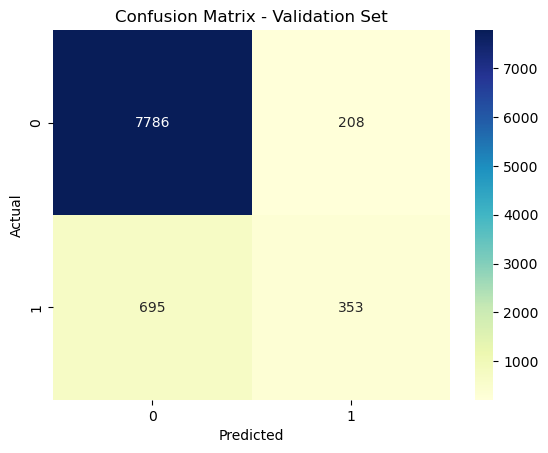

In [61]:
# Predict using the validation set
y_val_pred = lr.predict(X_val_scaled)

# Print accuracy and detailed classification report
print("📊 Logistic Regression - Validation Set Evaluation")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred))

# Confusion matrix heatmap
sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix - Validation Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# ✅ Step 9: Final Evaluation on 20% Test Set

📊 Logistic Regression - Test Set Evaluation
Accuracy: 0.900364923144974
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      7990
           1       0.63      0.35      0.45      1053

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.70      9043
weighted avg       0.89      0.90      0.89      9043



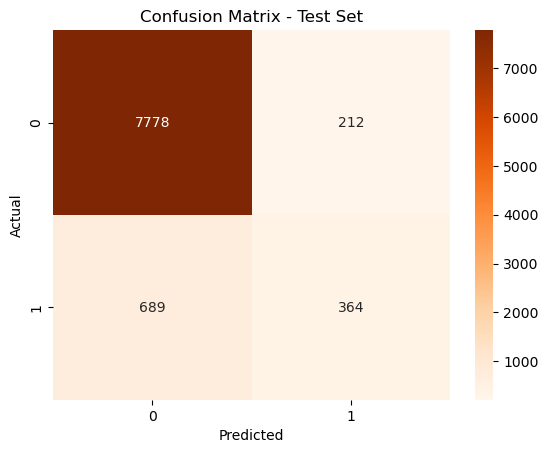

In [62]:
# Predict on test data
y_test_pred = lr.predict(X_test_scaled)

# Show performance on final unseen test data
print("📊 Logistic Regression - Test Set Evaluation")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

# Confusion matrix heatmap
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
